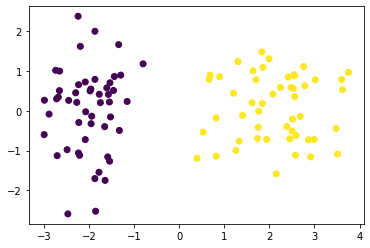

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification


X, t = make_classification(n_features=2, 
                           n_redundant=0, 
                           n_informative=1, 
                           n_clusters_per_class=1,
                          class_sep = 2)

plt.scatter(X[:,0], X[:,1], c=t)
plt.show()


In [13]:
target = t*2 - 1
D = np.shape(X)[1]
N = np.shape(X)[0]

In [31]:

# initialize the beta
# find the misclassified points
# take the first one and update beta (with small eta)
# Do this in a while loop stopping when no point 
# left with t_i != sign(beta^T x_i)


beta = np.random.normal(0,1,(D+1,))

Xtilde = np.hstack((np.ones((np.shape(X)[0],1)), X))

prediction = np.squeeze(
    np.sign(np.matmul(Xtilde, beta.reshape(-1,1))))

misclassified = np.multiply(prediction, target)

indices = np.squeeze(np.argwhere(misclassified <0))

eta = .1

while len(indices)>0:
    
    
    first = indices[0]
    t_i = target[first]
    x_i = Xtilde[first,:]
    
    beta = beta + eta*t_i*x_i
    
    prediction = np.squeeze(
    np.sign(np.matmul(Xtilde, beta.reshape(-1,1))))

    misclassified = np.multiply(prediction, target)
    indices = np.squeeze(np.argwhere(misclassified <0))



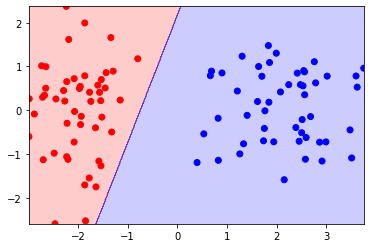

In [35]:
x1min = np.min(X[:,0])
x1max = np.max(X[:,0])
x2min = np.min(X[:,1])
x2max = np.max(X[:,1])

x1 = np.linspace(x1min, x1max, 500)
x2 = np.linspace(x2min, x2max, 500)

xx1, xx2 = np.meshgrid(x1, x2)

Xtilde_grid = np.vstack((xx1.flatten(), xx2.flatten())).T

Xtilde_grid = np.hstack((np.ones((np.shape(Xtilde_grid)[0], 1)), Xtilde_grid))

prediction = np.matmul(Xtilde_grid, beta.reshape(-1,1))
prediction = prediction>0

from matplotlib.colors import ListedColormap
cm_bright = ListedColormap(["#FF0000", "#0000FF"])

plt.contourf(xx1, xx2, prediction.reshape(np.shape(xx1)),
             alpha =.2, cmap = cm_bright)
plt.scatter(X[:,0], X[:,1], c=t,cmap = cm_bright)
plt.show()

